### Train Test Split

After we have distilled our data down into one or two grand dataframes, we would like to perform a train test split. However, there are some interesting nuances in our data that we must account for:
1. The athletes for any given year and for any given sport were ordered by their skill level (not their NIL evaluation)
2. It could be safely assumed that more talented athletes (i.e. athletes with higher skill) are more likely to have NIL deals

We need to implement a smarter version of the vanilla train_test_split that can help ensure that athletes of roughly all skill levels are included in all aspects of our splits

NOTE: SIADS 543 - Week 4 Assignment 1 had the task with the custom train_test_split <br>
      It is MANDATORY to only standardize AFTER train/test/split -- remember that these procedures take column information which would include your testing data!

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

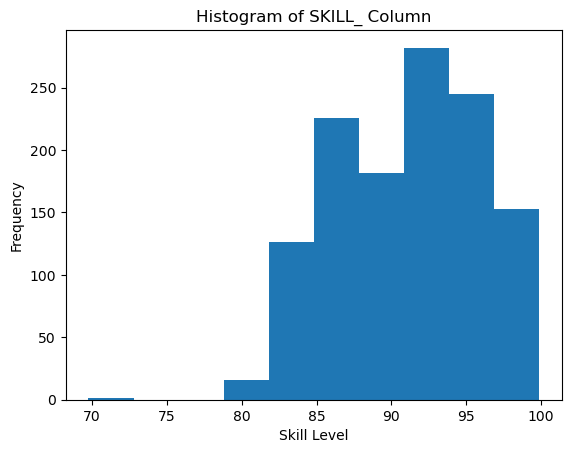

In [6]:
# df = pd.read_csv("cleaned_files/basketball_clean_unsupervised.csv")

# df["SKILL"].plot.hist()

# plt.xlabel("Skill Level")
# plt.ylabel("Frequency")
# plt.title("Histogram of SKILL_ Column")

# plt.show()

In [5]:
def custom_train_test_split(df, valid_size_=0.15, test_size_=0.15, RANDOM_STATE=0):
    """
        :: Input(s) ::
            df - a dataframe containing all of the features and the target feature
            valid_size - the subset of the remaining training set after the test set was formed
            test_size - the size ofthe validation when compared to the training set
            RANDOM_STATE - a random state for this function to promote repeatability
        :: Output(s) ::
            X_train - training feature dataframe
            X_valid - validation feature dataframe
            X_test - testing feature dataframe
            y_train - training target feature
            y_valid - validation target feature
            y_test - testing target feature
    """
    # Transform the continuous "SKILL" column into a categorical such that it could be binned
    bins = [0, 80, 85, 90, 95, 100]
    labels = ['Very Low Skill', 'Low Skill', 'Medium Skill', 'High Skill', 'Very High Skill']
    df["SKILL_CAT"] = pd.cut(df["SKILL"], bins=bins, labels=labels)

    # Shuffle the dataframe
    df = df.sample(frac=1, random_state=RANDOM_STATE)

    # Get our X and y arrays
    # Target Feature: NILVAL_LONG_USD

    y = df.pop("NILVAL_LONG_USD")
    X = df

    # Split the data into testing and non-testing
    X_train_valid, y_train_valid, X_test, y_test = train_test_split(X, y, train_size=(1-valid_size_-test_size_),
                                                                    stratify=X["SKILL_CAT"],
                                                                    random_state=RANDOM_STATE)
    
    # Split the non-testing data into training and validation
    X_train, y_train, X_valid, y_valid = train_test_split(X_train_valid, y_train_valid,
                                                          train_size=(1-valid_size_),
                                                          stratify=X["SKILL_CAT"],
                                                          random_state=RANDOM_STATE)

    return X_train, y_train, X_valid, y_valid, X_test, y_test